Практическая работа № 3

1. Сжать исходное изображение используя метод K-means, встроенный в 
библиотеку Scikit-learn при следующих вариантах количества цветов: 
2, 3, 4, 8, 16, 32, 64, 128, 256. Сохранить получившиеся изображения в 
отдельную папку (Scikit Compressor) и продемонстрировать их в 
отчёте.

In [1]:
from sklearn.cluster import KMeans
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/jeans5.jpg') # Вводим исходное изображение
print("Img's shape: ", img.shape) # Выводим параметры начального изображения

Img's shape:  (702, 467, 3)


In [3]:
img_r = (img / 255.0).reshape(-1,3) # Нормализуем изображение
print("New shape (img_r): ", img_r.shape) # Выводим параметры нормализованного изображения

New shape (img_r):  (327834, 3)


In [4]:
k_colors = KMeans(n_clusters = 8).fit(img_r) # Устанавливаем необходимое количество цветов и запускаем процесс обучения (кластеризации пикселей по группам)

c:\Users\HUAWEI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
imgC = k_colors.cluster_centers_[k_colors.labels_]

In [6]:
imgC = (np.reshape(imgC, (img.shape))*255).astype(np.uint8) # Возвращаем изображению исходные параметры
print("Compressed image's shape: ", imgC.shape)

Compressed image's shape:  (702, 467, 3)


In [7]:
cv2.imwrite('C:/Users/HUAWEI/OneDrive/Desktop/Compressed.jpg', imgC)

True

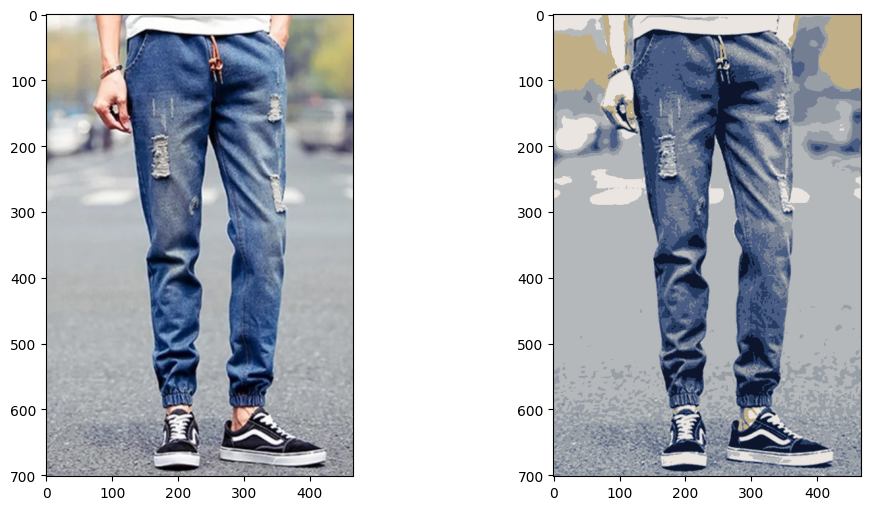

In [8]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)  
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # выводим исходное изображение
ax[1].imshow(cv2.cvtColor(imgC, cv2.COLOR_BGR2RGB)) # выводим сжатое изображение

2. Используя алгоритм, дающий возможность вручную выбрать 
количество итераций, подобрать оптимальное количество итераций по 
скорости выполнения и качеству сжатого изображения. После этого 
также следует произвести сжатие изображения с указанными выше 
количествами цветов. Сохранить получившиеся изображения в 
отдельную папку (K-means Compressor) и продемонстрировать их в 
отчёте.

Error = 1581.6704978738853
Error = 773.6754028610685
Error = 607.9476397886447
Error = 548.8276810500138
Error = 532.3847553389533
Error = 525.960912894409
Error = 521.8655468641183
Error = 518.648684701351
Error = 515.8637505102661
Error = 513.2871094533157


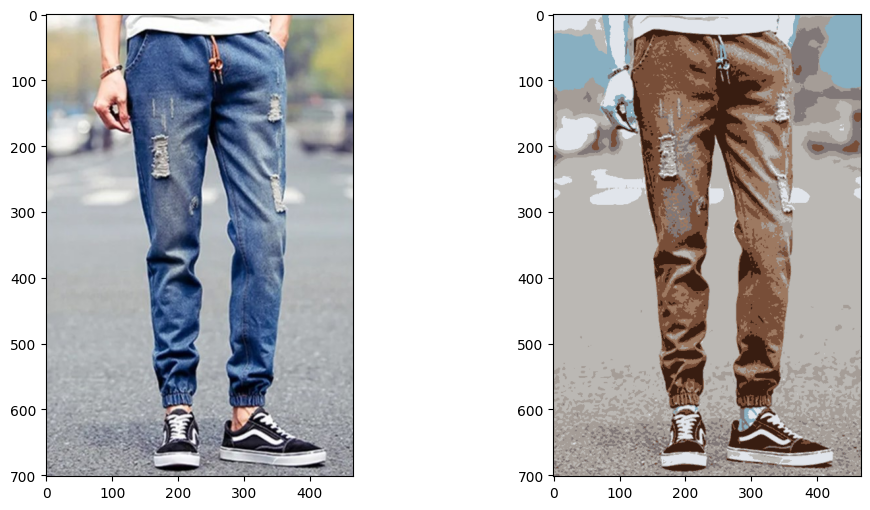

In [9]:
import numpy as np
import matplotlib
from PIL import Image


def kmeans(Input,K,Max_iters):
    N,D = np.shape(Input)
    R = np.random.permutation(N)
    Kvec = Input[R[0:K],:]
    Distance = np.zeros((N,K))
    
    for nn in range(0,Max_iters):
        F = np.zeros((N,K))
        for kk in range(0,K):
            Distance[:,kk] = np.sum( np.square(Input - np.tile( Kvec[kk,:],     (N,1)),dtype=np.float64),axis=1 )
        Dmin = Distance.argmin(axis=1) % Distance.shape[1]
        for mm in range(0,K):
            if np.size(Dmin[mm==Dmin]) >0:
                Kvec[mm,:] = np.mean(Input[mm==Dmin],axis=0)
        for ii in range(0,N):
            F[ii,Dmin[ii]] = 1
        error = sum(sum((F*Distance)/N))
        print('Error = ' + str(error))
    return Kvec,Dmin

Datain = np.asarray(Image.open('C:/Users/HUAWEI/OneDrive/Desktop/jeans5.jpg'),dtype=np.float64)

ReshapedData = np.reshape(Datain, (np.size(Datain,0) * np.size(Datain,1),np.size(Datain,2)))

K = 8 # устанавливаем количество цветов
Max_iters = 10 # устанавливаем количество итераций, чем больше итераций, тем тщательнее будет осуществляться кластеризация и тем дольше будет работать программа

Kvec,Dmin = kmeans(ReshapedData,K,Max_iters)

Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))

for jj in range(0,K):
    Dvec[jj==Dmin,:] = Kvec[jj,:]

imout = np.reshape(np.uint8(Dvec), (np.size(Datain,0),np.size(Datain,1),len(Kvec[0,:])))

cv2.imwrite('C:/Users/HUAWEI/OneDrive/Desktop/Output.jpg', imout)
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)  
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # выводим исходное изображение
ax[1].imshow(cv2.cvtColor(imout, cv2.COLOR_BGR2RGB)) # выводим сжатое изображение

3. Составить сравнительную таблицу со следующими данными: 
количество цветов, вес сжатого изображения по алгоритму из п.1, 
время выполнения программы для сжатия изображения по алгоритму 
из п.1, вес сжатого изображения по алгоритму из п.2., время 
выполнения программы для сжатия изображения по алгоритму из п.2

In [10]:
import pandas as pd
import os
import time

In [11]:
# Создаем пустую таблицу для сравнения, где: 
# k - кол-во цветов, 
# SC I - вес исходного изображения Scikit Compressor, 
# SC time - время выполнения Scikit Compressor, 
# KC I - вес исходного изображения K-Means Compressor, 
# KC time - время выполнения K-Means Compressor 

data = pd.read_csv("C:/Users/HUAWEI/OneDrive/Desktop/report3.csv", names = ['k','SC I','SC time','KC I','KC time'])
data['k'] = [2, 3, 4, 8, 16, 32, 64, 128, 256]
data

,k,SC I,SC time,KC I,KC time
0,2,NaN,NaN,NaN,NaN
1,3,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN
3,8,NaN,NaN,NaN,NaN
4,16,NaN,NaN,NaN,NaN
5,32,NaN,NaN,NaN,NaN
6,64,NaN,NaN,NaN,NaN
7,128,NaN,NaN,NaN,NaN
8,256,NaN,NaN,NaN,NaN


In [12]:
# Заполняем таблицу для 1 варианта (Scikit Compressor)

imgsc = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/jeans5.jpg') # Вводим исходное изображение
k = [2, 3, 4, 8, 16, 32, 64, 128, 256]


for i in range(len(k)):

    start = time.time()

    imgsc_r = (imgsc / 255.0).reshape(-1,3) # Нормализуем изображение
    k_colors = KMeans(n_clusters = k[i]).fit(imgsc_r) # Устанавливаем необходимое количество цветов и запускаем процесс обучения (кластеризации пикселей по группам)
    imgscC = k_colors.cluster_centers_[k_colors.labels_]
    imgscC = (np.reshape(imgscC, (img.shape))*255).astype(np.uint8) # Возвращаем изображению исходные параметры
    imgscC_n = cv2.imwrite('C:/Users/HUAWEI/OneDrive/Desktop/Compressed.jpg', imgscC)
    imgscC_n = os.stat('C:/Users/HUAWEI/OneDrive/Desktop/Compressed.jpg')

    sci = imgscC_n.st_size
    data.at[i,'SC I'] = sci

    end = time.time() - start
    data.at[i,'SC time'] = end

    print('Прошли все значения с k = ', k[i])



c:\Users\HUAWEI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Прошли все значения с k =  2


c:\Users\HUAWEI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Прошли все значения с k =  3


c:\Users\HUAWEI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Прошли все значения с k =  4


c:\Users\HUAWEI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Прошли все значения с k =  8


c:\Users\HUAWEI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Прошли все значения с k =  16


c:\Users\HUAWEI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Прошли все значения с k =  32


c:\Users\HUAWEI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Прошли все значения с k =  64


c:\Users\HUAWEI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Прошли все значения с k =  128


c:\Users\HUAWEI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Прошли все значения с k =  256


In [13]:
# Заполняем таблицу для 2 варианта (k-means)

img_kc = np.asarray(Image.open('C:/Users/HUAWEI/OneDrive/Desktop/jeans5.jpg'),dtype=np.float64)
rimgt = np.reshape(img_kc, (np.size(img_kc,0) * np.size(img_kc,1),np.size(img_kc,2)))
k = [2, 3, 4, 8, 16, 32, 64, 128, 256]
iters = 10

for i in range(len(k)):

    start = time.time()
    
    Kvec, Dmin = kmeans(rimgt, k[i], iters)
    Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))
    for jj in range(0, i):
        Dvec[jj==Dmin,:] = Kvec[jj,:]
    imout = np.reshape(np.uint8(Dvec), (np.size(img_kc,0),np.size(img_kc,1),len(Kvec[0,:])))
    imout_n = cv2.imwrite('C:/Users/HUAWEI/OneDrive/Desktop/Output.jpg', imout)
    imout_n = os.stat('C:/Users/HUAWEI/OneDrive/Desktop/Output.jpg')
   
   
    sci = imout_n.st_size
    data.at[i,'KC I'] = sci

    end = time.time() - start
    data.at[i,'KC time'] = end

    print('Прошли все значения с k = ', k[i])

Error = 7294.578362833186
Error = 4828.622116877834
Error = 3161.4960734929664
Error = 2716.648144505485
Error = 2632.0170907040206
Error = 2617.012297417049
Error = 2614.431542148628
Error = 2614.0420615520084
Error = 2613.971161686544
Error = 2613.9645573689804
Прошли все значения с k =  2
Error = 2529.8556312033484
Error = 1952.242702366345
Error = 1940.3050838763902
Error = 1937.4736860091664
Error = 1936.7724491787274
Error = 1936.6126550104368
Error = 1936.57470949982
Error = 1936.5545961028947
Error = 1936.547051588866
Error = 1936.5457661393089
Прошли все значения с k =  3
Error = 6425.947616781893
Error = 1622.4774887355256
Error = 1403.514589564319
Error = 1305.2173207092108
Error = 1247.4357109092052
Error = 1210.6051436913917
Error = 1184.7337173309788
Error = 1165.6201554395006
Error = 1150.4204920723378
Error = 1139.1767798517888
Прошли все значения с k =  4
Error = 994.7217707742018
Error = 635.5343288453056
Error = 587.4740276942207
Error = 568.5777635247496
Error = 559

In [14]:
#Сохраняем и выводим итоговую таблицу

data.to_csv('C:/Users/HUAWEI/OneDrive/Desktop/report3_done.csv')

data

,k,SC I,SC time,KC I,KC time
0,2,85027,0.713331,5907,3.177794
1,3,111763,1.553173,79160,3.267494
2,4,116312,1.627506,92294,3.464483
3,8,131939,2.929658,188567,4.171345
4,16,134988,4.392354,143429,5.616435
5,32,128284,7.996937,162402,8.592979
6,64,117808,20.905258,104968,15.848225
7,128,109878,37.965706,86032,28.621765
8,256,104366,81.618952,115062,56.396204


4. Подобрать оптимальное количество цветов и итераций для сжатия 
изображения без наглядного ухудшения качества изображения. 
Привести пример на пяти разных изображениях


Error = 29.32111472424336
Error = 14.207848949727907
Error = 12.068665981400505


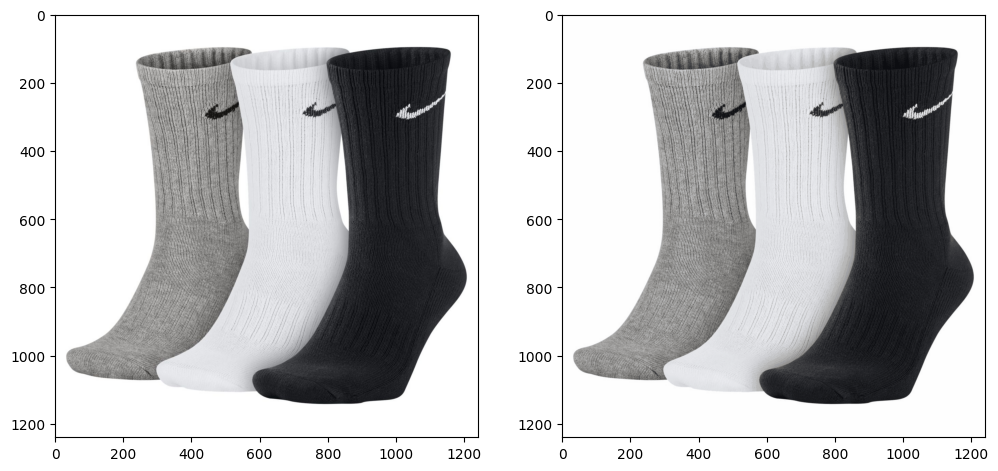

In [13]:
image_input_1 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/socks3.jpg')
image_input = np.asarray(image_input_1, dtype=np.float64)
image_load = np.reshape(image_input, (np.size(image_input,0) * np.size(image_input,1),np.size(image_input,2)))

k = 100
iters = 3

Kvec, Dmin = kmeans(image_load, k, iters)

Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))

for jj in range(0,k):
    Dvec[jj==Dmin,:] = Kvec[jj,:]

imout = np.reshape(np.uint8(Dvec), (np.size(image_input,0),np.size(image_input,1),len(Kvec[0,:])))

cv2.imwrite('C:/Users/HUAWEI/OneDrive/Desktop/Output1.jpg', imout)

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)  
ax[0].imshow(cv2.cvtColor(image_input_1, cv2.COLOR_BGR2RGB)) # выводим исходное изображение
ax[1].imshow(cv2.cvtColor(imout, cv2.COLOR_BGR2RGB)) # выводим сжатое изображение

Error = 143.9248750000006
Error = 43.03275996830807
Error = 29.315806606244664


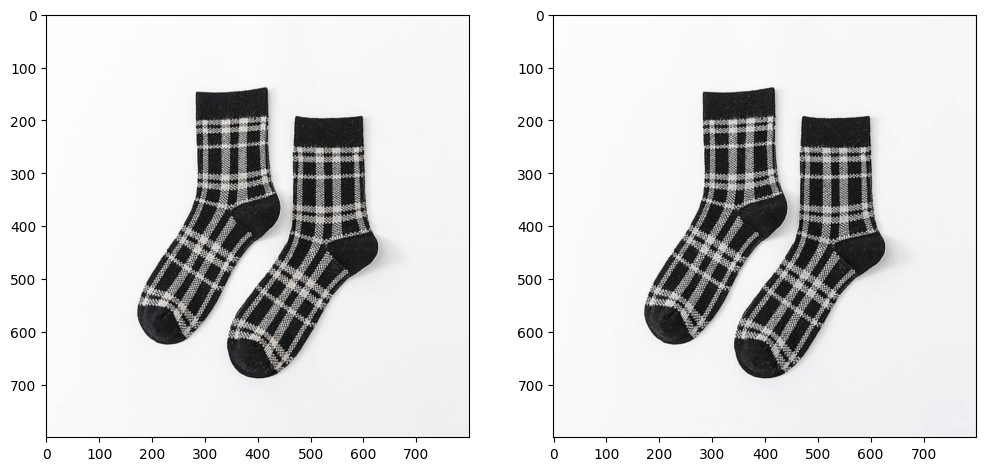

In [15]:
image_input_2 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/socks5.jpg')
image_input = np.asarray(image_input_2,dtype=np.float64)
image_load = np.reshape(image_input, (np.size(image_input,0) * np.size(image_input,1),np.size(image_input,2)))

k = 100
iters = 3

Kvec, Dmin = kmeans(image_load, k, iters)

Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))

for jj in range(0,k):
    Dvec[jj==Dmin,:] = Kvec[jj,:]

imout = np.reshape(np.uint8(Dvec), (np.size(image_input,0),np.size(image_input,1),len(Kvec[0,:])))

cv2.imwrite('C:/Users/HUAWEI/OneDrive/Desktop/Output2.jpg', imout) 

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)  
ax[0].imshow(cv2.cvtColor(image_input_2, cv2.COLOR_BGR2RGB)) # выводим исходное изображение
ax[1].imshow(cv2.cvtColor(imout, cv2.COLOR_BGR2RGB)) # выводим сжатое изображение

Error = 40.14716961497864
Error = 14.861734986323016
Error = 10.315778496058865


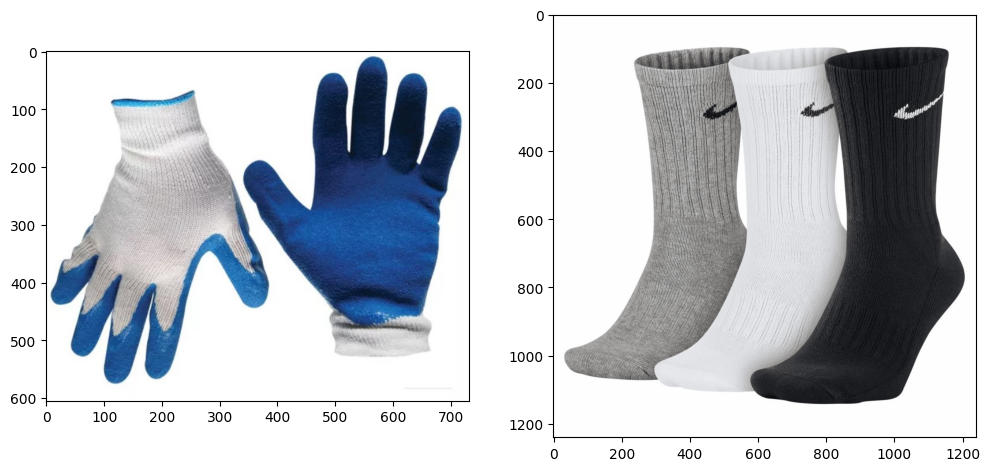

In [16]:
image_input_3 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/gloves5.jpg')
image_input = np.asarray(image_input_1,dtype=np.float64)
image_load = np.reshape(image_input, (np.size(image_input,0) * np.size(image_input,1),np.size(image_input,2)))

k = 100
iters = 3

Kvec, Dmin = kmeans(image_load, k, iters)

Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))

for jj in range(0,k):
    Dvec[jj==Dmin,:] = Kvec[jj,:]

imout = np.reshape(np.uint8(Dvec), (np.size(image_input,0),np.size(image_input,1),len(Kvec[0,:])))

cv2.imwrite('C:/Users/HUAWEI/OneDrive/Desktop/Output3.jpg', imout)

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)  
ax[0].imshow(cv2.cvtColor(image_input_3, cv2.COLOR_BGR2RGB)) # выводим исходное изображение
ax[1].imshow(cv2.cvtColor(imout, cv2.COLOR_BGR2RGB)) # выводим сжатое изображение

Error = 263.6957603207588
Error = 72.49077377450661
Error = 51.51296972383463
Error = 45.52787351488153
Error = 42.481179686664966
Error = 40.870062520591674
Error = 39.35490858868721


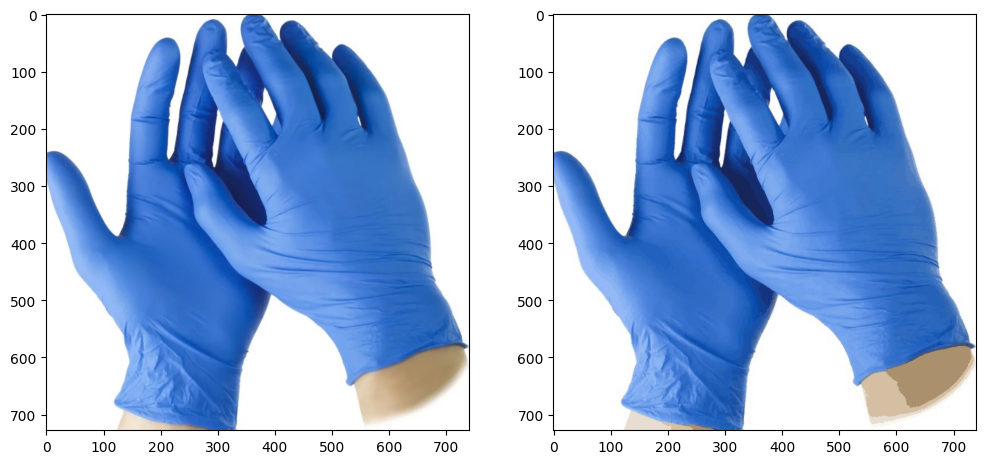

In [18]:
image_input_4 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/gloves2.jpg')
image_input = np.asarray(image_input_4, dtype=np.float64)
image_load = np.reshape(image_input, (np.size(image_input,0) * np.size(image_input,1),np.size(image_input,2)))

k = 100
iters = 7

Kvec, Dmin = kmeans(image_load, k, iters)

Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))

for jj in range(0,k):
    Dvec[jj==Dmin,:] = Kvec[jj,:]

imout = np.reshape(np.uint8(Dvec), (np.size(image_input,0),np.size(image_input,1),len(Kvec[0,:])))

cv2.imwrite('C:/Users/HUAWEI/OneDrive/Desktop/Output4.jpg', imout)

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)  
ax[0].imshow(cv2.cvtColor(image_input_4, cv2.COLOR_BGR2RGB)) # выводим исходное изображение
ax[1].imshow(cv2.cvtColor(imout, cv2.COLOR_BGR2RGB)) # выводим сжатое изображение

Error = 72.05728749999987
Error = 37.23202002995804
Error = 31.20127605808013
Error = 29.57107776244942
Error = 28.749416554075797
Error = 28.264517044896248
Error = 27.94591231346454
Error = 27.68301426868129
Error = 27.452199411661933
Error = 27.280319564413936


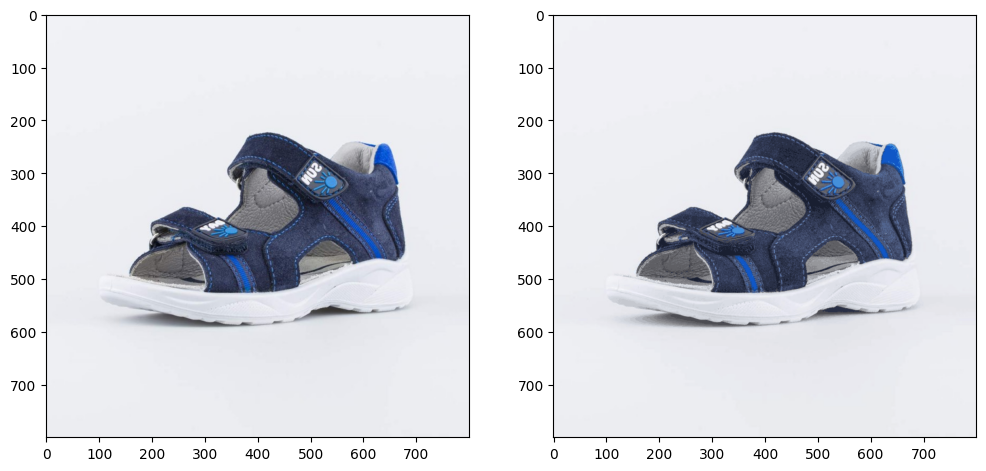

In [19]:
image_input_5 = cv2.imread('C:/Users/HUAWEI/OneDrive/Desktop/sandal.jpg')
image_input = np.asarray(image_input_5, dtype=np.float64)
image_load = np.reshape(image_input, (np.size(image_input,0) * np.size(image_input,1),np.size(image_input,2)))

k = 100
iters = 10

Kvec, Dmin = kmeans(image_load, k, iters)

Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))

for jj in range(0,k):
    Dvec[jj==Dmin,:] = Kvec[jj,:]

imout = np.reshape(np.uint8(Dvec), (np.size(image_input,0),np.size(image_input,1),len(Kvec[0,:])))

cv2.imwrite('C:/Users/HUAWEI/OneDrive/Desktop/Output5.jpg', imout) 

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(6)  
ax[0].imshow(cv2.cvtColor(image_input_5, cv2.COLOR_BGR2RGB)) # выводим исходное изображение
ax[1].imshow(cv2.cvtColor(imout, cv2.COLOR_BGR2RGB)) # выводим сжатое изображение